In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
IMAGE_SIZE = [224, 224]

train_path = r'C:/Users/hai/Desktop/MiniProject/dataset/Hair Diseases - Final/train'
test_path = r'C:/Users/hai/Desktop/MiniProject/dataset/Hair Diseases - Final/test'
val_path = r'C:/Users/hai/Desktop/MiniProject/dataset/Hair Diseases - Final/val'

In [3]:
rn = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
for layer in rn.layers:
    layer.trainable = False
    
folders = glob(train_path+'\*')

In [6]:
x = Flatten()(rn.output)

In [7]:
prediction = Dense(10, activation='softmax')(x)
model = Model(inputs=rn.input, outputs=prediction)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(directory=train_path,
                target_size = (224,224),
                batch_size = 64,
                class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(directory=test_path,
                target_size = (224,224),
                batch_size = 64,
                class_mode = 'categorical', shuffle=False)
val_set = val_datagen.flow_from_directory(directory=val_path,
                target_size = (224,224),
                batch_size = 64,
                class_mode = 'categorical', shuffle=False)

Found 9600 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.


In [10]:
import keras
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=["acc"]
)

In [11]:
import time 
print(time.ctime())
from time import time
t_start = time()

Wed Aug 24 17:03:50 2022


In [12]:
import keras
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

annealer = ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-4)
checkpoint = ModelCheckpoint('/temp/{epoch}_VGG19.h5', verbose=1, save_best_only=False, mode='auto', save_freq='epoch')


In [13]:
history = model.fit(
                  training_set,
                  validation_data=val_set,
                  epochs=20,
                  batch_size=128,
                  callbacks=[annealer, checkpoint],
                  steps_per_epoch=len(training_set),
                  validation_steps=len(test_set)
                )

Epoch 1/20
150/150 [==============================] - 4404s 29s/step - loss: 1.7309 - acc: 0.4920 - val_loss: 0.4357 - val_acc: 0.8975

Epoch 00001: saving model to /temp\1_VGG19.h5
Epoch 2/20
150/150 [==============================] - 4462s 30s/step - loss: 0.3012 - acc: 0.9366 - val_loss: 0.2746 - val_acc: 0.9275

Epoch 00002: saving model to /temp\2_VGG19.h5
Epoch 3/20
150/150 [==============================] - 4521s 30s/step - loss: 0.1491 - acc: 0.9824 - val_loss: 0.1888 - val_acc: 0.9608

Epoch 00003: saving model to /temp\3_VGG19.h5
Epoch 4/20
150/150 [==============================] - 4158s 28s/step - loss: 0.0947 - acc: 0.9902 - val_loss: 0.1730 - val_acc: 0.9517

Epoch 00004: saving model to /temp\4_VGG19.h5
Epoch 5/20
150/150 [==============================] - 3643s 24s/step - loss: 0.0636 - acc: 0.9964 - val_loss: 0.1167 - val_acc: 0.9775

Epoch 00005: saving model to /temp\5_VGG19.h5
Epoch 6/20
150/150 [==============================] - 3620s 24s/step - loss: 0.0449 - acc:

In [50]:
#time.ctime()
train_time = time() - t_start
print('\nTrain time: %.3f'%(train_time/60), ' mins')


Train time: 1708.654  mins


In [51]:
model.save("VGG19-Final.h5")
print("Model Saved as : VGG19-Final.h5")

import json
np.save('my_history.npy',history.history)
import pandas as pd

# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = 'history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv: 
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

Model Saved as : VGG19-Final.h5


In [52]:
from time import time
start = time()
evl = model.evaluate(test_set)
test_time = time() - start

test_loss, test_acc = evl[0]*100, evl[1]*100

msg = f'Test Accuracy = {test_acc:5.2f} %'
msg1 = f'Test Loss = {test_loss:5.2f} %'
msg2 = f'Test Time = {test_time:5.2f} s'
print(msg)
print(msg1)
print(msg2)

19/19 [==============================] - 493s 26s/step - loss: 0.0541 - acc: 0.9858
Test Accuracy = 98.58 %
Test Loss =  5.41 %
Test Time = 496.96 s


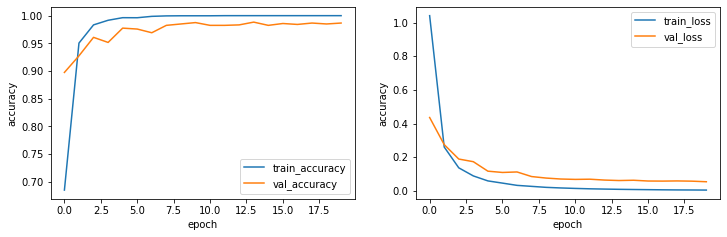

In [53]:
# Plotting Loss & Accuracy Graphs
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(12, 12))
plt.subplot(3, 2, 1)
plt.plot(history.history['acc'], label = 'train_accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(3, 2, 2)
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [54]:
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(15, 15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

True :  [0 0 0 ... 9 9 9]
Predicted :  [0 0 0 ... 9 9 9]


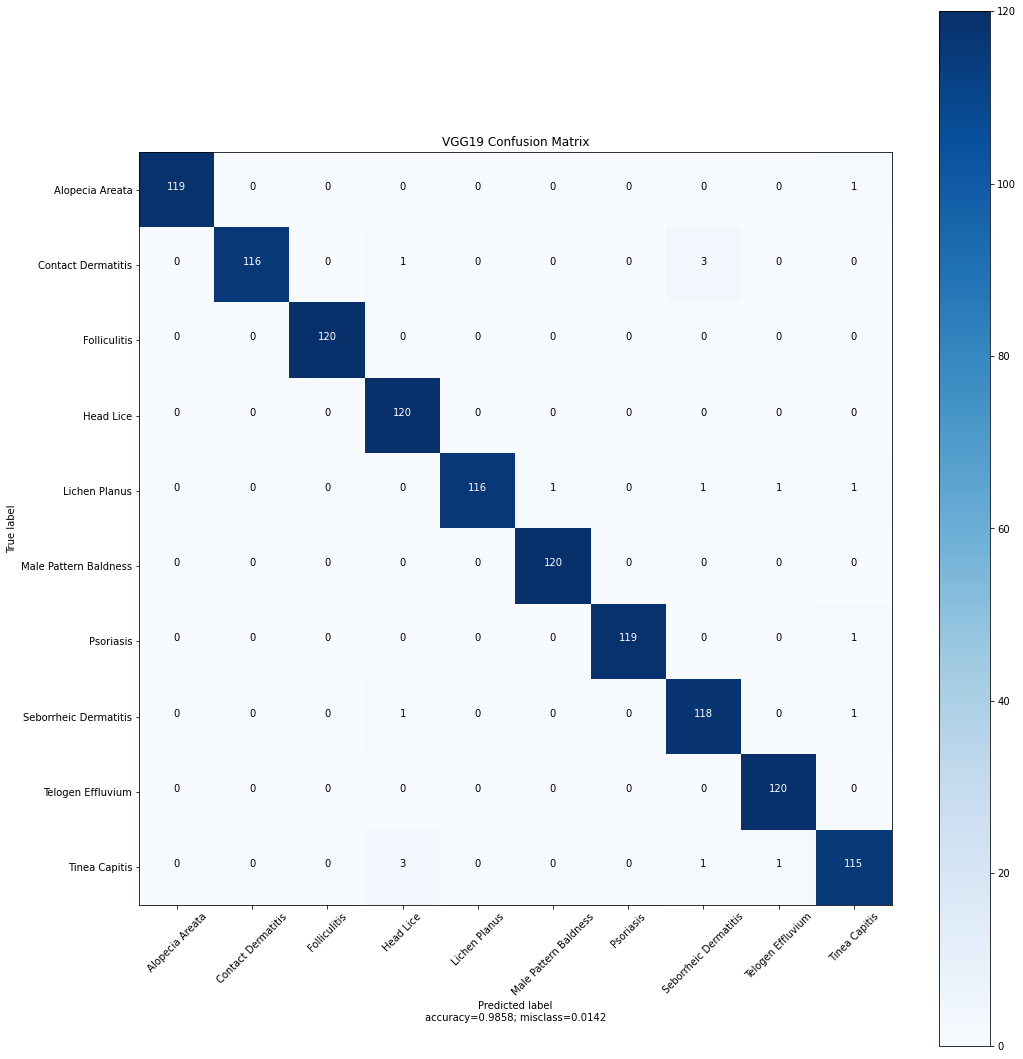

In [55]:
from sklearn.metrics import confusion_matrix

classes = ['Alopecia Areata', 'Contact Dermatitis', 'Folliculitis', 'Head Lice', 'Lichen Planus', 'Male Pattern Baldness', 'Psoriasis', 'Seborrheic Dermatitis', 'Telogen Effluvium', 'Tinea Capitis']

y_true = np.array(test_set.labels)
print("True : ", y_true)

y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
print("Predicted : ", y_pred)

conf_mat = confusion_matrix(y_true, y_pred)

plot_confusion_matrix(cm           = conf_mat,
                      normalize    = False,
                      target_names = classes,
                      title        = "VGG19 Confusion Matrix")

In [56]:
from PIL import Image

def prediction(img):
    jpgfile=Image.open(img)
    display(jpgfile)
    jpgfile = jpgfile.resize((224, 224)) 
    img_as_matrix = np.array(jpgfile)  
    img_as_matrix = img_as_matrix.reshape(1,224,224,3)  
    value = model.predict(img_as_matrix)
    x=np.argmax(value, axis=1)
    return classes[x[0]]

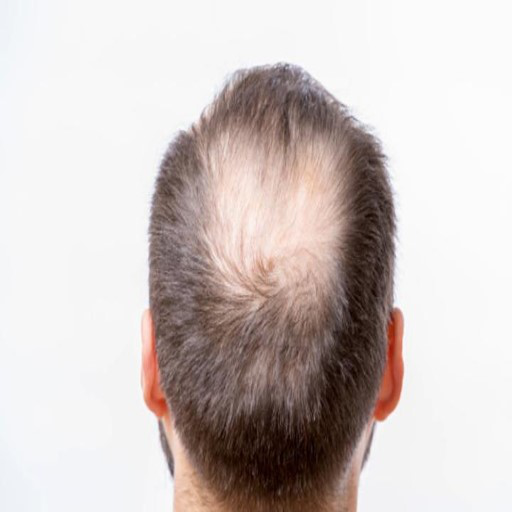

'Male Pattern Baldness'

In [68]:
prediction("C:/Users/hai/Desktop/MiniProject/dataset/Hair Diseases - Final/test/Male Pattern Baldness/male_pattern_baldness_0037.jpg")

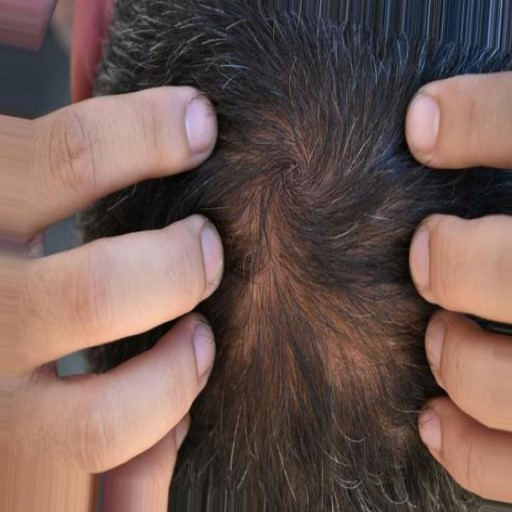

'Telogen Effluvium'

In [58]:
prediction("C:/Users/hai/Desktop/MiniProject/dataset/Hair Diseases - Final/test/Telogen Effluvium/telogen_effluvium_0944.jpg")

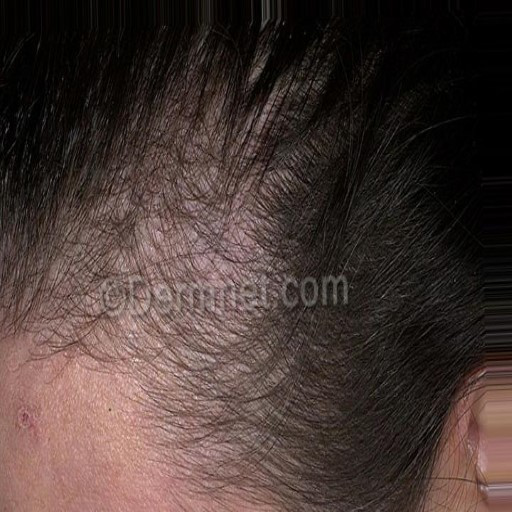

'Telogen Effluvium'

In [59]:
prediction("C:/Users/hai/Desktop/MiniProject/dataset/Hair Diseases - Final/test/Telogen Effluvium/telogen_effluvium_0945.jpg")

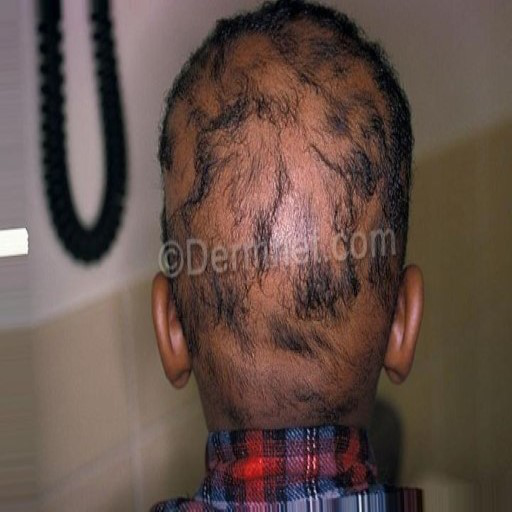

'Alopecia Areata'

In [60]:
prediction("C:/Users/hai/Desktop/MiniProject/dataset/Hair Diseases - Final/test/Alopecia Areata/alopecia_areata_0268.jpg")

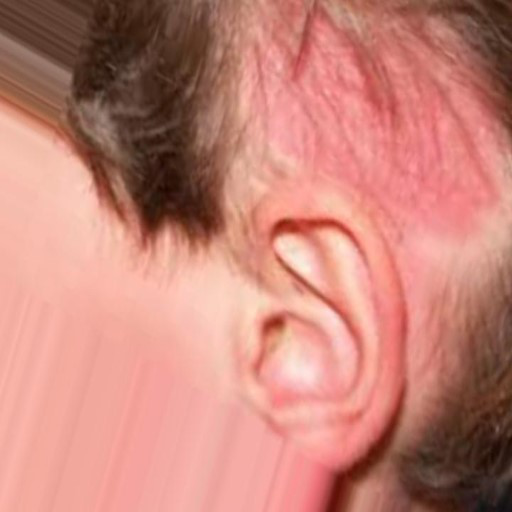

'Tinea Capitis'

In [61]:
prediction("C:/Users/hai/Desktop/MiniProject/dataset/Hair Diseases - Final/test/Tinea Capitis/tinea_capitis_0094.jpg")

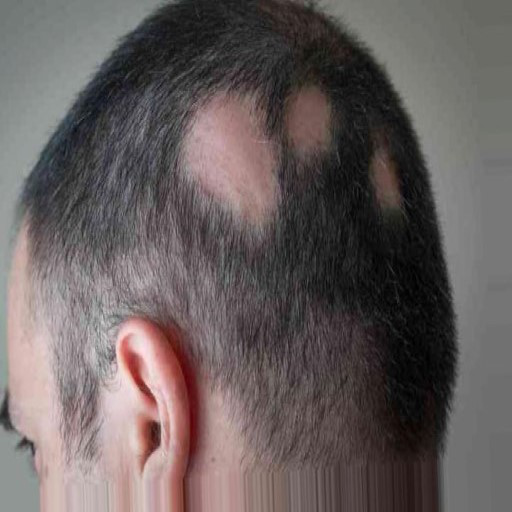

'Male Pattern Baldness'

In [62]:
prediction("C:/Users/hai/Desktop/MiniProject/dataset/Hair Diseases - Final/test/Alopecia Areata/alopecia_areata_0723.jpg")

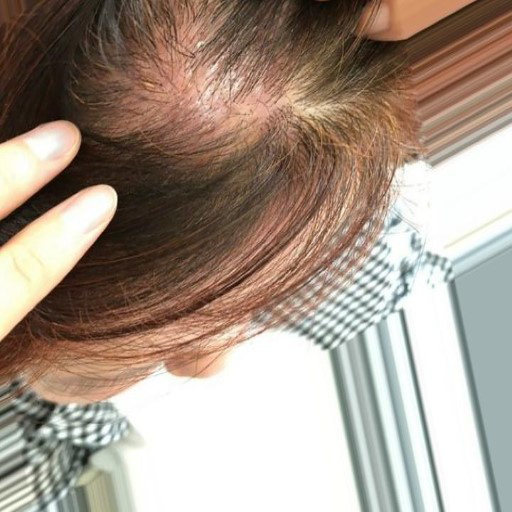

'Contact Dermatitis'

In [63]:
prediction("C:/Users/hai/Desktop/MiniProject/dataset/Hair Diseases - Final/test/Contact Dermatitis/contact_dermatitis_0026.jpg")

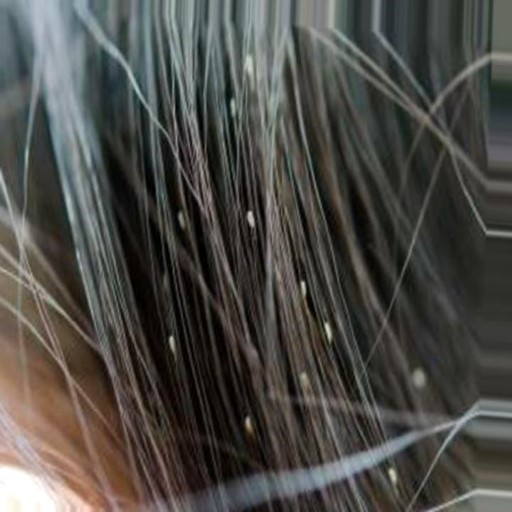

'Head Lice'

In [64]:
prediction("C:/Users/hai/Desktop/MiniProject/dataset/Hair Diseases - Final/test/Head Lice/head_lice_0090.jpg")

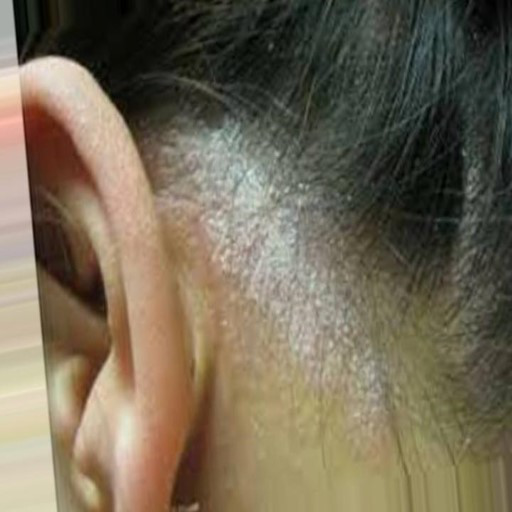

'Psoriasis'

In [65]:
prediction("C:/Users/hai/Desktop/MiniProject/dataset/Hair Diseases - Final/test/Psoriasis/psoriasis_0090.jpg")

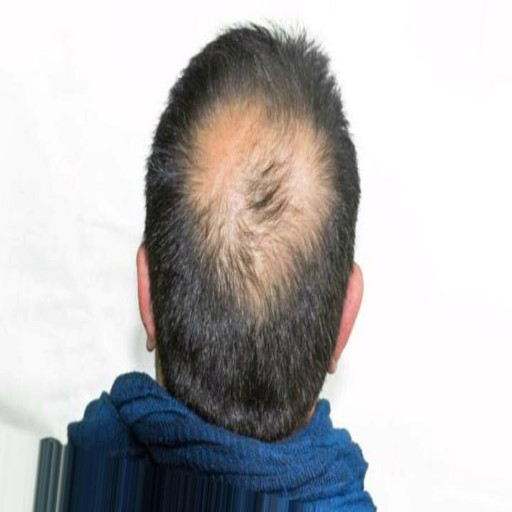

'Male Pattern Baldness'

In [67]:
prediction("C:/Users/hai/Desktop/MiniProject/dataset/Hair Diseases - Final/test/Male Pattern Baldness/male_pattern_baldness_0134.jpg")